# Non-sinusoidal Periodic Waveforms
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [waveform_non-sinusoidal.ipynb](https://github.com/diegoinacio/creative-coding-notebooks/blob/master/Sound-Design/waveform_non-sinusoidal.ipynb)
---
Overview about *non-sinusoidal periodic waveforms*.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np

from _utils import *

In [2]:
plt.rcParams['figure.figsize'] = (16, 4)

In [3]:
fs = 44100                      # Sampling rate
dur = 3                         # Duration in seconds
t = np.linspace(0, dur, fs*dur) # Time vector

### Sine wave model
---
$$ \large
x(t)=A sin(2\pi f t + \phi)=A sin(\omega t + \phi)
$$

where,

- $A$ = The aplitude;
- $f$ = The ordinary frequency;
- $\omega$ = The angular frequency;
- $\phi$ = The phase.

In [4]:
A = 0.25
f = 110
omega = 2*np.pi*f
phi = 0

## 1. Square wave
---
$$ \large
x_\textrm{sqr}(t)=A \textrm{sgn}(sin(\omega t + \phi)) \quad ; \quad sgn(x)=\begin{cases}\begin{aligned} -1, x<0 \\\ 0, x=0 \\\ 1, x>0 \end{aligned}\end{cases}
$$

In [5]:
x_sqr = A*np.sign(np.sin(omega*t + phi))
x_sqr[-1] = 1 # fix normalized output

In [6]:
Audio(x_sqr, rate=fs)

audio mono


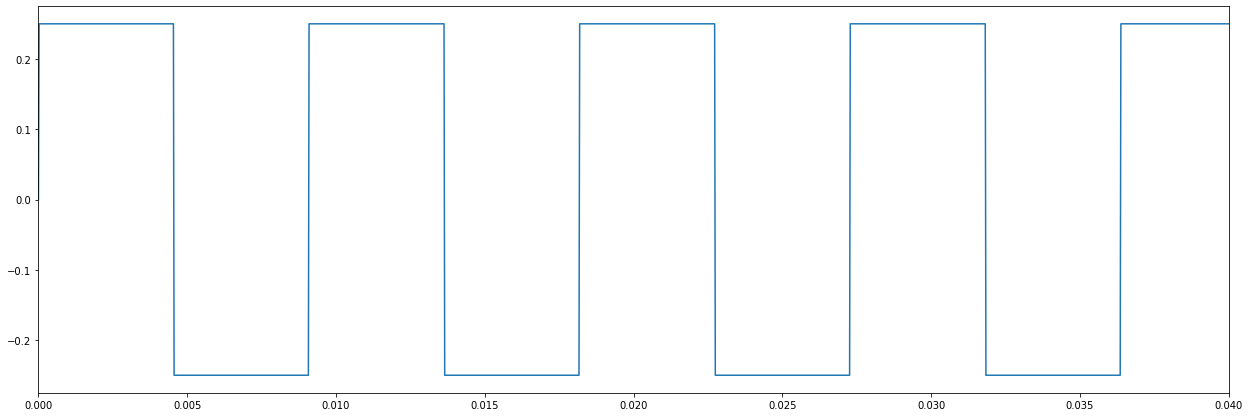

In [7]:
audiovis(x_sqr[:-1], tlim=[0, 0.04])

### 1.1. Harmonic form
---
$$ \large
x_\textrm{sqrh}(t)=A\frac{4}{\pi}\sum_{k=1}^{\infty}\frac{sin((2k-1)(\omega t + \phi))}{2k-1}
$$

In [8]:
N = 32
K = np.array([range(N)]).T + 1.0

_x_sqrh = np.sin((2*K - 1)*(omega*t + phi))/(2*K - 1)
x_sqrh = A*4/np.pi*np.sum(_x_sqrh, axis=0)
x_sqrh[-1] = 1 # fix normalized output

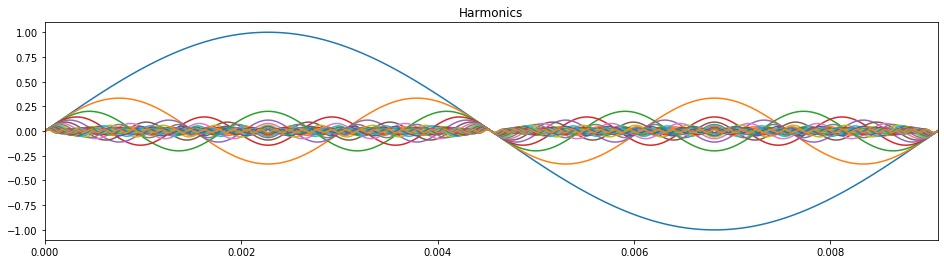

In [9]:
for h in _x_sqrh:
    plt.plot(t, h)
plt.xlim([0, 1/f])
plt.title('Harmonics')
plt.show()

In [10]:
Audio(x_sqrh, rate=fs)

audio mono


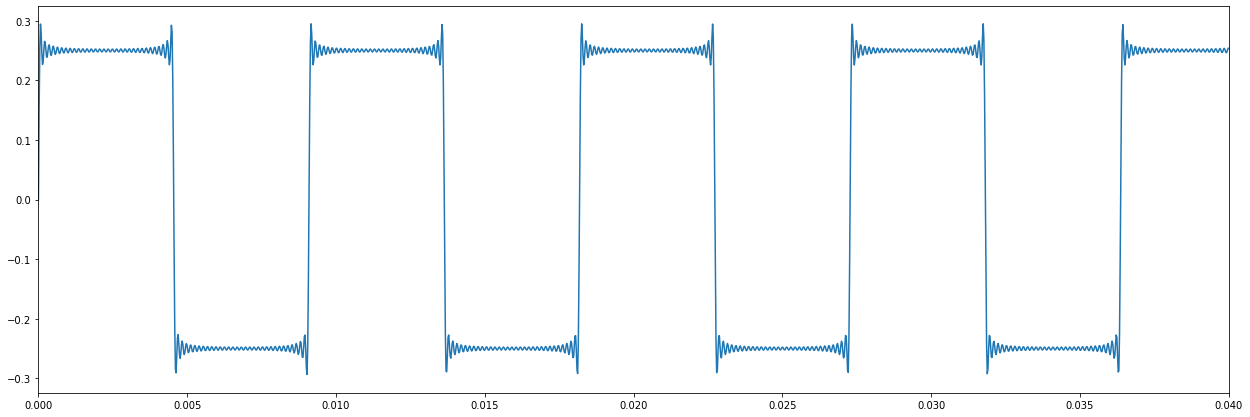

In [11]:
audiovis(x_sqrh[:-1], tlim=[0, 0.04])

audio mono


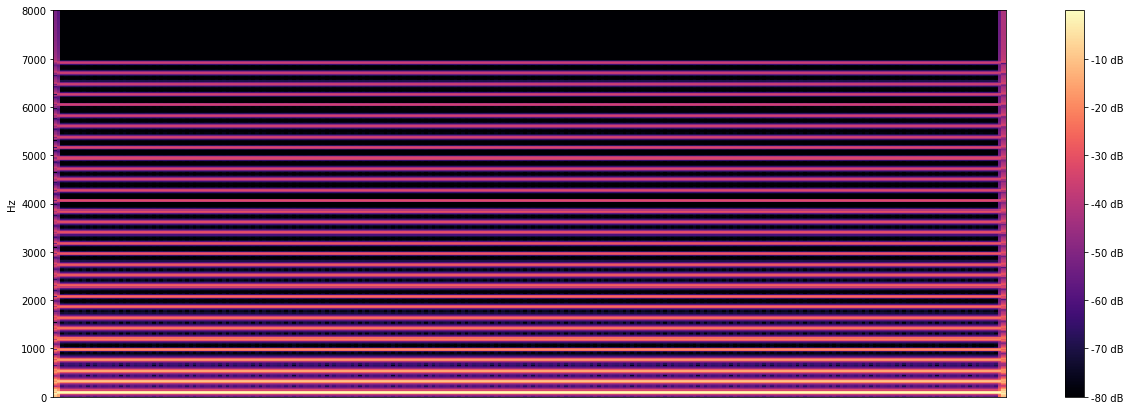

In [12]:
spectrogram(x_sqrh)

## 2. Triangular wave
---
$$ \large
x_\textrm{tri}(t)=A\frac{2}{a}\left(t+\frac{\phi}{\omega}-a\left\lfloor\frac{t}{a}+\frac{\phi}{\omega a}+\frac{1}{2}\right\rfloor\right)(-1)^{\left\lfloor\frac{t}{a}+\frac{\phi}{\omega a}+\frac{1}{2}\right\rfloor} \quad ; \quad a=\frac{1}{2f}
$$

In [13]:
A = 0.5
a = 1/(2*f)
floor = np.vectorize(np.floor)
tpw = t + phi/omega # only for saving space
x_tri = A*2/a*(tpw - a*floor(tpw/a + 1/2))*(-1)**floor(tpw/a + 1/2)
x_tri[-1] = 1 # fix normalized output

In [14]:
Audio(x_tri, rate=fs)

audio mono


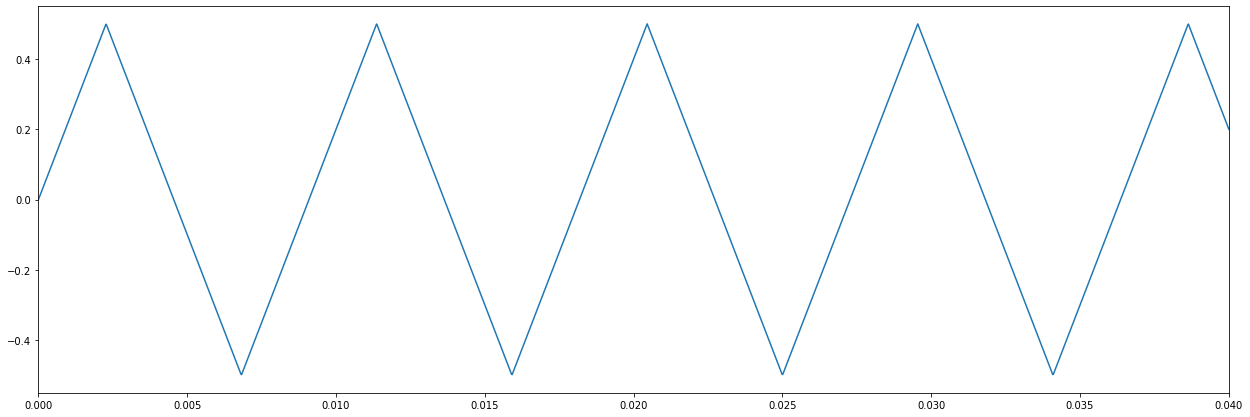

In [15]:
audiovis(x_tri[:-1], tlim=[0, 0.04])

### 2.1. Harmonic form
---
$$ \large
x_\textrm{trih}(t)=A\frac{8}{\pi^2}\sum_{k=0}^{\infty}(-1)^k \frac{sin((2k+1)(\omega t + \phi))}{(2k+1)^2}
$$

In [16]:
N = 16
K = np.array([range(N)]).T

_x_trih = (-1)**K*np.sin((2*K + 1)*(omega*t + phi))/(2*K + 1)**2
x_trih = A*8/np.pi**2*np.sum(_x_trih, axis=0)
x_trih[-1] = 1 # fix normalized output

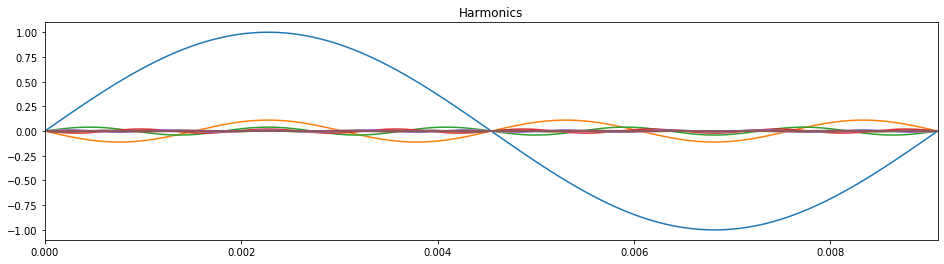

In [17]:
for h in _x_trih:
    plt.plot(t, h)
plt.xlim([0, 1/f])
plt.title('Harmonics')
plt.show()

In [18]:
Audio(x_trih, rate=fs)

audio mono


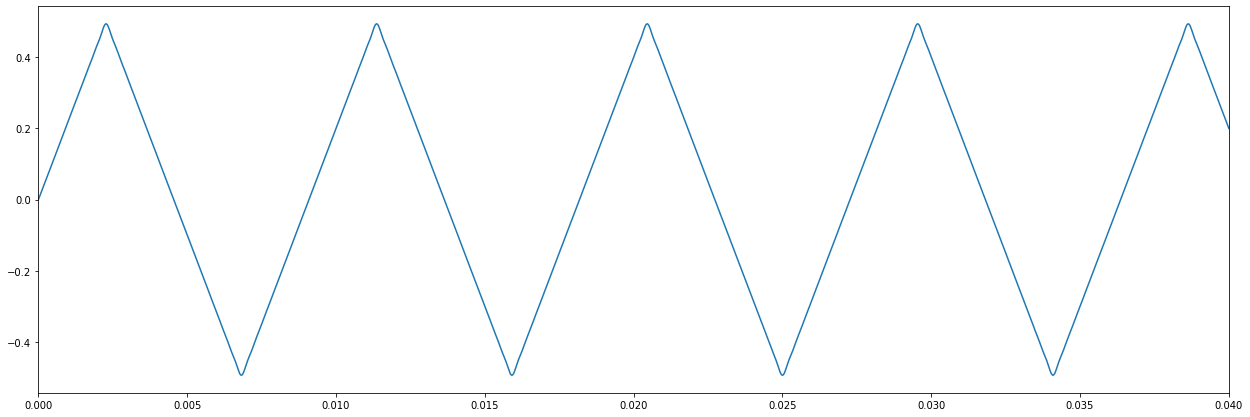

In [19]:
audiovis(x_trih[:-1], tlim=[0, 0.04])

audio mono


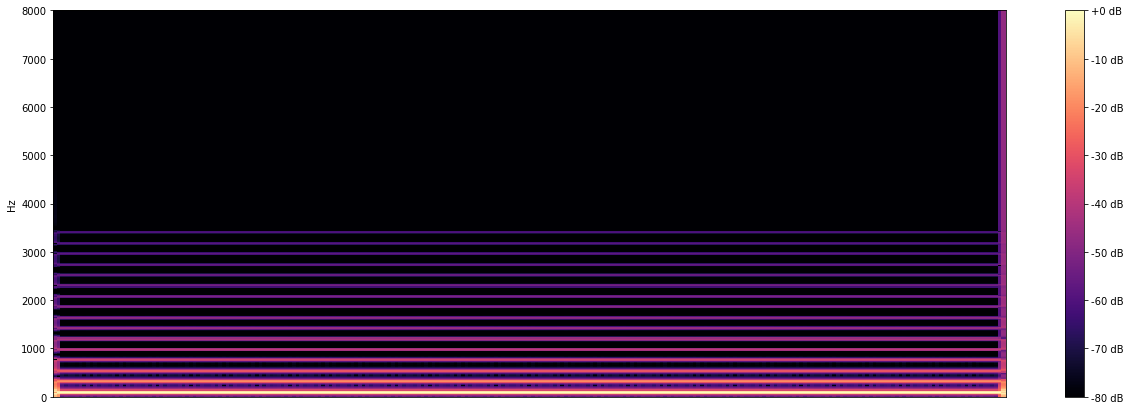

In [20]:
spectrogram(x_trih)

## 3. Sawtooth wave
---
$$ \large
x_\textrm{saw}(t)=2A\left(\frac{t}{a}+\frac{\phi}{\omega a}-\left\lfloor\frac{t}{a}+\frac{\phi}{\omega a}+\frac{1}{2}\right\rfloor\right) \quad ; \quad a=\frac{1}{f}
$$

In [21]:
A = 0.25
a = 1/f
floor = np.vectorize(np.floor)
x_saw = A*2*(t/a + phi/(omega*a) - floor(t/a + phi/(omega*a) + 1/2))
x_saw[-1] = 1 # fix normalized output

In [22]:
Audio(x_saw, rate=fs)

audio mono


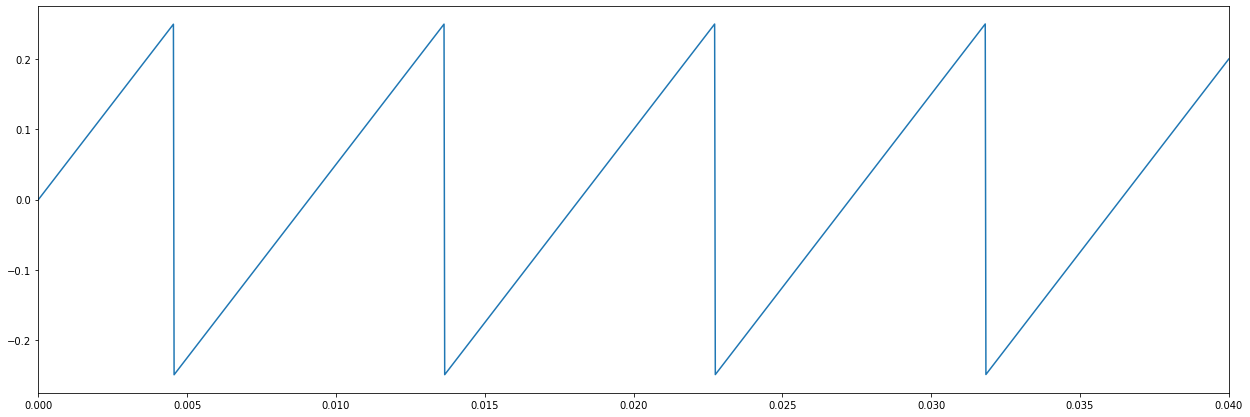

In [23]:
audiovis(x_saw[:-1], tlim=[0, 0.04])

### 3.1. Harmonic form
---
$$ \large
x_\textrm{sawh}(t)=\frac{A}{2}-\frac{A}{\pi}\sum_{k=1}^{\infty}(-1)^k \frac{sin(k(\omega t + \phi))}{k}
$$

In [24]:
N = 64
K = np.array([range(N)]).T + 1.0

_x_sawh = (-1)**K*np.sin(K*(omega*t + phi))/K
x_sawh = A/2 - A/np.pi*np.sum(_x_sawh, axis=0)
x_sawh[-1] = 1 # fix normalized output

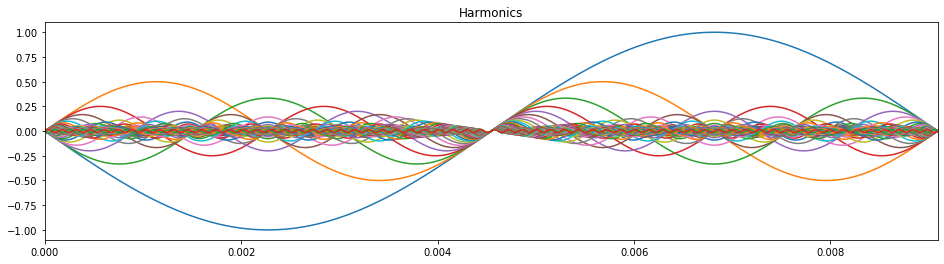

In [25]:
for h in _x_sawh:
    plt.plot(t, h)
plt.xlim([0, 1/f])
plt.title('Harmonics')
plt.show()

In [26]:
Audio(x_sawh, rate=fs)

audio mono


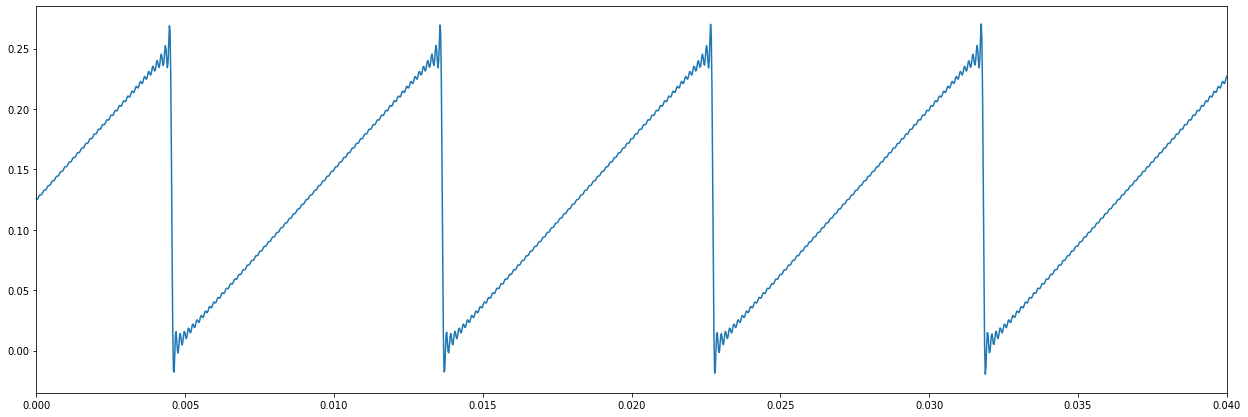

In [27]:
audiovis(x_sawh[:-1], tlim=[0, 0.04])

audio mono


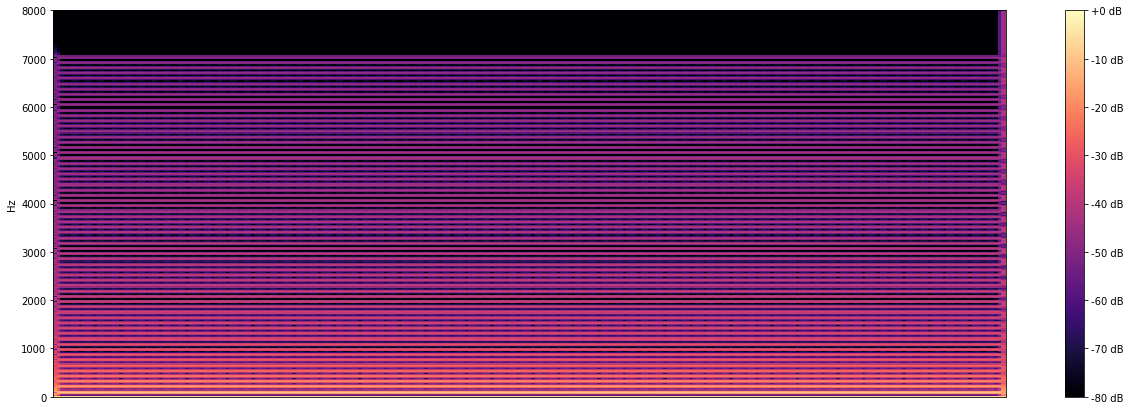

In [28]:
spectrogram(x_sawh)

## 4. Pulse wave
---
$$ \large
x_1=\left(t+\frac{\phi}{2\pi f}\right) \ mod \ T \quad ; \quad x_\textrm{pulse}(t)=Ax_1 \quad ; \quad x_1=\begin{cases}\begin{aligned} 1, x_1\leq\tau \\\ 0, x_1>\tau \end{aligned}\end{cases}
$$

In [29]:
A = 0.25
T = 1/f                 # Period  
tau = 0.1
tau *= T
x1 = (t + phi/(2*np.pi*f)) % T
x_pulse = A*(x1 <= tau)
x_pulse[-1] = 1         # fix normalized output

In [30]:
Audio(x_pulse, rate=fs)

audio mono


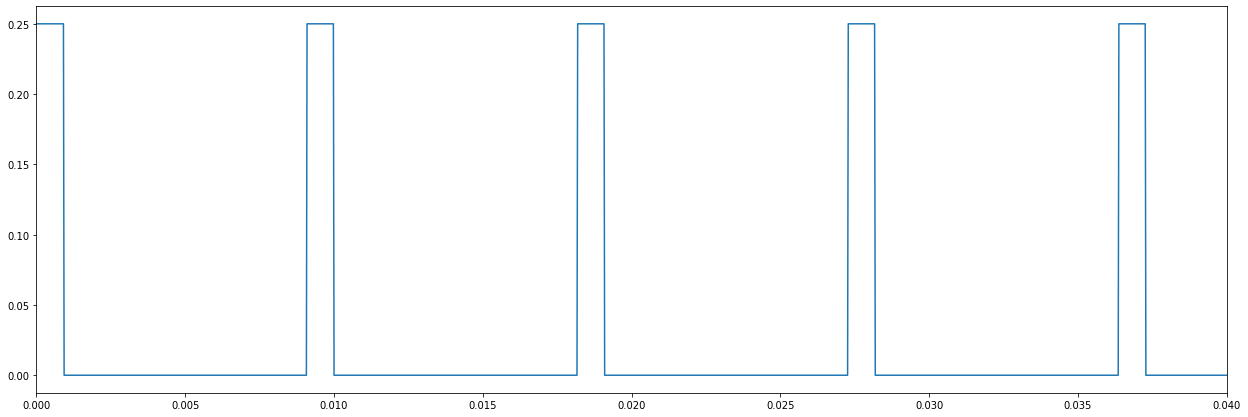

In [31]:
audiovis(x_pulse[:-1], tlim=[0, 0.04])

### 4.1. Harmonic form
---
$$ \large
x_\textrm{pulseh}(t)=A\left[\frac{\tau}{T}+\sum_{k=1}^{\infty}\frac{2}{k\pi}sin\left(\frac{\pi k\tau}{T}\right)cos\left(\frac{2\pi k}{T}\left(t+\frac{T\phi}{2\pi}-\frac{\tau}{2}\right)\right)\right]
$$

In [32]:
N = 64
K = np.array([range(N)]).T + 1.0

_x_pulseh = 2/(K*np.pi)*np.sin(np.pi*K*tau/T)*np.cos(2*np.pi*K/T*(t + T*phi/(2*np.pi) - tau/2))
x_pulseh = A*(tau/T + np.sum(_x_pulseh, axis=0))
x_pulseh[-1] = 1 # fix normalized output

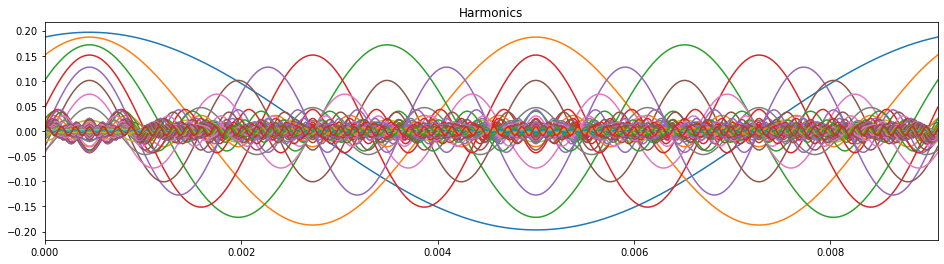

In [33]:
for h in _x_pulseh:
    plt.plot(t, h)
plt.xlim([0, 1/f])
plt.title('Harmonics')
plt.show()

In [34]:
Audio(x_pulseh, rate=fs)

audio mono


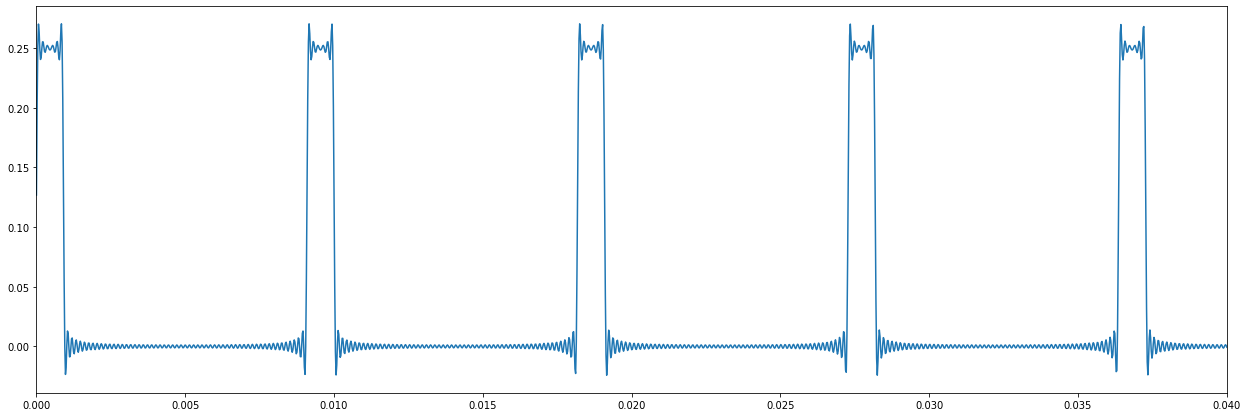

In [35]:
audiovis(x_pulseh[:-1], tlim=[0, 0.04])

audio mono


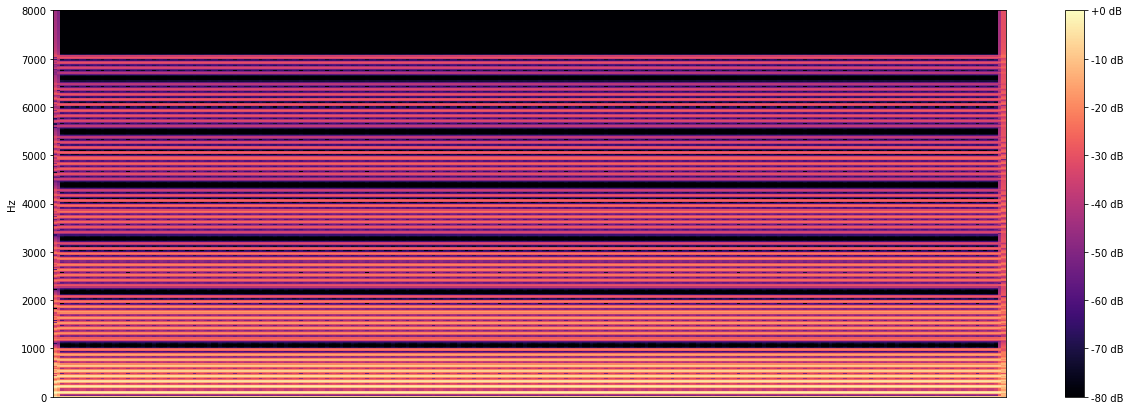

In [36]:
spectrogram(x_pulseh)